In [1]:
import cv2
import numpy as np
from random import shuffle
from tqdm import tqdm

In [3]:
infected='C:/Users/ACER PC/Downloads/cell_images/Parasitized'
uninfected='C:/Users/ACER PC/Downloads/cell_images/Uninfected'

In [4]:
def create_data():
    train_data=[]
    for img in tqdm(os.listdir(infected)):
        try:
            path1=os.path.join(infected,img)
            im1=cv2.imread(path1,0)                                    #Read the image
            im1=cv2.resize(im1,(50,50))
            train_data.append([im1,1])
        except Exception as e:
            print(str(e))
    for img in tqdm(os.listdir(uninfected)):
        try:
            path=os.path.join(uninfected,img)
            im=cv2.imread(path,0)                                    #Read the image
            im=cv2.resize(im,(50,50))
            train_data.append([im,0])
        except Exception as e:
            print(str(e))
    shuffle(train_data)
    return train_data

In [5]:
import os

In [6]:
train=create_data()

100%|█████████▉| 13774/13780 [03:04<00:00, 199.17it/s]

OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



100%|█████████▉| 13778/13780 [01:00<00:00, 249.92it/s]

OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



100%|██████████| 13780/13780 [01:00<00:00, 228.02it/s]


In [7]:
np.array([train]).shape

(1, 27558, 2)

In [8]:
train=np.array([train])

In [9]:
train=train.reshape(27558,2)

In [10]:
train

array([[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
        0],
       [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
        0],
       [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
        0],
       ...,
       [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
        1],
       [array([[0, 0, 0, ..., 0,

In [11]:
train_ar=np.zeros((27558,2501))
for i in range(0,27558):
    train_ar[i]=np.hstack((np.array(train[i][0]).ravel(),np.array(train[i][1])))

In [12]:
train_ar.shape

(27558, 2501)

In [13]:
X=train_ar[:,:-1]
Y=train_ar[:,-1:]

In [14]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]])

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [17]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

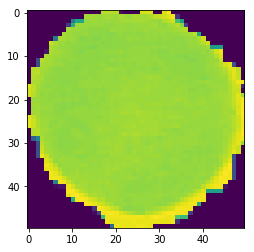

Cell is infected


In [31]:
import matplotlib.pyplot as plt
d=xtest[444]
d.shape=(50,50)
plt.imshow(d)
plt.show()
x= dtc.predict(xtest[[0]])
if x==0:
    print('Cell if uninfected')
else:
    print('Cell is infected')